## HIE Data 정리 ver 3.4

   1. raw data를 C:\Users\user\Downloads\HIE 폴더에 가져다 놓는다. (HIE 폴더 내에 1, 2, 3, 4 폴더가 각각 생성되도록)
   2. Cell>Run all 
   3. [날짜 입력] 란에 데이터 변환을 원하는 날짜 입력 (YYYYMMDD) -> 1~4 데이터 자동으로 불러들인 후 RPM 그래프 출력
   4. [평가정보 입력] 란에 작업조건(Sample 명, 평가 RPM, 평가 시간) 입력
   5. [File 저장하기] 란에서 xlsx 파일로 내보내기 (파일명 지정 가능) 표현
  
   
   참고.   
    - 파일의 생성일을 기준으로 DataFrame이 생성되므로 생성일이 변경되지 않도록 복사/이동 시 주의 <br>
    - Ver 3.0 <br>
       : 실제 데이터 저장시간으로 계산하도록 설정하여 오차 감소, 폴더 4의 Raw data 항목 추가<br>
    - Ver 3.1<br>
       : sheet 1에서 후작업 편의를 위한 테이블 추가(AVG, Max-AVG, AVG-Min)<br>
    - Ver 3.2<br>
       : 가장 file 이 많아서 오래걸리는 1번 sheet 정리 부분에 진행률(%) 표기<br>
    - Ver 3.3<br>
       : sheet 1의 14D 의 raw data를 추가 (22.2.17)<br>
    - Ver 3.4<br>
       : progress 수정하여 소요시간 단축 및 전반적인 라인 구성 개선 (23.7.21)<br>
      

## 실험을 수행한 날짜 입력

In [1]:
import os
import time  # # 작업 시 소요시간을 체크하기 위함 (본 구문에 start, end 로 계산)
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def split_ymdhms(name):  ##년월일시분초 분할 함수 정의 #1
    return datetime(
        int(name.split("/")[0]) + 2000,
        int(name.split("/")[1]),
        int(name.split("/")[2].split(" ")[0]),
        int(name.split("/")[2].split(" ")[1].split(":")[0]),
        int(name.split("/")[2].split(" ")[1].split(":")[1]),
        int(name.split("/")[2].split(" ")[1].split(":")[2]),
    )
    ## raw data 상에서 연도는 끝 두자리만 표현되므로(ex)20, 21 등) 계산 시 0020년으로 인식되는 문제가 발생하여 2000을 더하여 2020년이 되도록 함
    ## raw data 1번폴더


def split_ymdhms2(name):  ##년월일시분초 분할 함수 정의 #2
    return datetime(
        int(name.split("/")[0]),
        int(name.split("/")[1]),
        int(name.split("/")[2].split(" ")[0]),
        int(name.split("/")[2].split(" ")[1].split(":")[0]),
        int(name.split("/")[2].split(" ")[1].split(":")[1]),
        int(name.split("/")[2].split(" ")[1].split(":")[2]),
    )
    ## raw data 2번폴더


# 결과를 확인하려는 날짜를 입력받음
inputdate = input(
    "결과를 확인하려는 날짜를 입력하세요(" + "\33[31m" + "YYYYMMDD" + "\33[0m" + "): "
)  ## '\33[31m' 31 대신 다른 숫자 넣으면 다른 색상으로 출력 가능
input_year = int(inputdate[0:4])
input_month = int(inputdate[4:6])
input_day = int(inputdate[6:8])
# print(input_year,input_month,input_day)   # 8자리 숫자를 연/월/일 구분

# 1번 폴더에서 해당 날짜의 파일이 존재하는지 확인 후 알림


path1 = "./1"  ## logging.csv의 folder 주소
list_1 = os.listdir(path1)  ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_1f = []  ## 최종 리스트

if len(list_1) == 2:  ## logging.csv 외에 다른 파일(즉 backup 폴더)이 있다는 가정
    fileMtime = datetime.fromtimestamp(
        os.path.getmtime(path1 + "\\" + list_1[1])
    )  ##logging.csv 의 수정날짜
    path1b = "./1/backup"  ## 백업파일들의 folder 주소
    list_1b = os.listdir(path1b)

    for i in range(len(list_1b)):
        fileMtime_1b = datetime.fromtimestamp(
            os.path.getmtime(path1b + "\\" + list_1b[i])
        )  ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day) == (
            fileMtime_1b.year,
            fileMtime_1b.month,
            fileMtime_1b.day,
        ):  ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_1f.append(list_1b[i])  ## 해당 파일을 file_list_1f 리스트에 등록
        #            elif (input_day)<(fileMtime_1b.day): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
        elif int(inputdate) < int(
            str(fileMtime_1b.year)
            + str(fileMtime_1b.month).zfill(2)
            + str(fileMtime_1b.day)
        ):  ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_1f.append(list_1b[i])  ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue

print("입력한 날짜 " + str(inputdate) + "에 해당하는 파일은 " + str(len(list_1f)) + "개 입니다")

결과를 확인하려는 날짜를 입력하세요(YYYYMMDD):  20210127


입력한 날짜 20210127에 해당하는 파일은 15개 입니다


## 1번 자료 DataFrame화

In [2]:
# 시작시간
start = time.time()

df_1 = pd.DataFrame()

# csv 파일 내용을 DF 화
if len(list_1) == 2:
    for l1 in list_1f:
        df = pd.read_csv(
            path1b + "\\" + l1, sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
        )
        df_1 = pd.concat([df_1, df])

df = pd.read_csv(
    path1 + "\\" + "logging.csv", sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
)  ## 마지막으로 logging.csv 파일을 붙여줌
df_1 = pd.concat([df_1, df])

## 데이터 앞/뒤 다른 날 평가한 데이터행을 삭제 / boolean 조건문 적용
df_1 = df_1.reset_index(drop=True)
input_ymd = str(input_year)[2:] + "/" + str(input_month) + "/" + str(input_day)
df_1 = df_1[df_1.Date.str.contains(input_ymd)]

## 시간흐름을 표현하는 Dates 열 생성
df_1["Dates"] = 0
for i in range(len(df_1)):
    ## 전체의 처음과 끝을 설정하여 n 수로 나누어 각 행의 시간을 계산(1번 logging 시 초까지 동일한 행이 있기 때문)
    #    if i == int(len(df_1) / 1.5):
    df_1["Dates"].iloc[i] = datetime(
        input_year,
        input_month,
        input_day,
        int(df_1["Date"].iloc[i].split(" ")[1].split(":")[0]),
        int(df_1["Date"].iloc[i].split(" ")[1].split(":")[1]),
        int(df_1["Date"].iloc[i].split(" ")[1].split(":")[2]),
    )
df_1["Dates_diff"] = df_1.Dates.diff()  ## 다음행과의 차이가 0 또는 1이 아닌 것을 찾음

df_1.drop(
    ["No.", "Status", "Unnamed: 17"], axis=1, inplace=True
)  ## No, Status, 25-BP 다음 Unnamed: 17 열 삭제
df_1.Dates[df_1.Dates_diff == "0 days 00:00:00"] += timedelta(
    seconds=0.4
)  ## df_1 의 경우 샘플링을 0.5초 간격으로 하고, 초단위로 기록을 하므로, 같은 시간에 데이터가 2개 생김. 그래프를 만들 때 시간에 차이를 두기 위하여 두번째 데이터는 0.4초를 지연시킴
df_1 = df_1.reset_index(drop=True)  ## 인덱스 일련번호 reset


# zek2.dtypes          # 각 column 의 type 확인
# df_1=df_1.astype({'6.5D':int})                     ## 컬럼을 통째로 str -> int로 변환

# print ("file_list: {}".format(file_list_1))
# print ("file_list: {}".format(file_list_1b))


# 종료시간
# end = time.time()

# 설명
# print("소요시간: %d분 %0.2f초" % ((end - start) // 60, (end - start) % 60))

df_1.tail()

C:\Users\user\AppData\Local\Temp\ipykernel_17652\4053413685.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Dates"].iloc[i] = datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_17652\4053413685.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.Dates[df_1.Dates_diff == "0 days 00:00:00"] += timedelta(


,Date,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP,Dates,Dates_diff
14328,21/1/27 11:3:9,70,95,155,139,147,163,178,168,211,180,163,175,171,156,2021-01-27 11:03:09,0 days 00:00:01
14329,21/1/27 11:3:10,106,90,27,49,182,170,167,186,194,184,180,161,178,156,2021-01-27 11:03:10,0 days 00:00:01
14330,21/1/27 11:3:10,121,83,140,66,127,195,164,135,201,201,183,167,164,156,2021-01-27 11:03:10.400000,0 days 00:00:00
14331,21/1/27 11:3:11,80,97,155,141,154,162,176,164,210,182,159,176,172,156,2021-01-27 11:03:11,0 days 00:00:01
14332,21/1/27 11:3:11,92,0,155,146,164,168,181,177,186,179,159,180,175,156,2021-01-27 11:03:11.400000,0 days 00:00:00


## 2번 자료 DataFrame화

In [3]:
# start = time.time()

path2 = "./2"  ## logging.csv의 folder 주소
list_2 = os.listdir(path2)  ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_2f = []  ## 최종 리스트

if len(list_2) == 2:  ## logging.csv 외에 다른 파일(즉 backup 폴더)이 있다는 가정
    fileMtime = datetime.fromtimestamp(
        os.path.getmtime(path2 + "\\" + list_2[1])
    )  ##logging.csv 의 수정날짜
    path2b = "./2/backup"  ## 백업파일들의 folder 주소
    list_2b = os.listdir(path2b)

    for i in range(len(list_2b)):
        fileMtime_2b = datetime.fromtimestamp(
            os.path.getmtime(path2b + "\\" + list_2b[i])
        )  ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day) == (
            fileMtime_2b.year,
            fileMtime_2b.month,
            fileMtime_2b.day,
        ):  ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_2f.append(list_2b[i])  ## 해당 파일을 file_list_2f 리스트에 등록
        #            elif (input_day)<(fileMtime_1b.day): ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
        elif int(inputdate) < int(
            str(fileMtime_2b.year)
            + str(fileMtime_2b.month).zfill(2)
            + str(fileMtime_2b.day)
        ):  ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_2f.append(list_2b[i])  ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue

df_2 = pd.DataFrame()

# csv 파일 내용을 DF 화
if len(list_2) == 2:
    for l2 in list_2f:
        df = pd.read_csv(
            path2b + "\\" + l2, sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
        )
        df_2 = pd.concat([df_2, df])

df = pd.read_csv(
    path2 + "\\" + "logging.csv", sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
)  ## 마지막으로 logging.csv 파일을 붙여줌
df_2 = pd.concat([df_2, df])

## 데이터 앞/뒤 다른 날 평가한 데이터행을 삭제 / boolean 조건문 적용
df_2 = df_2.reset_index(drop=True)
input_ymd = str(input_year) + "/" + str(input_month) + "/" + str(input_day)
df_2 = df_2[df_2.Date.str.contains(input_ymd)]


## 시간흐름을 표현하는 Dates 열 생성
df_2["Dates"] = 0
for i in range(len(df_2)):
    df_2["Dates"].iloc[i] = datetime(
        input_year,
        input_month,
        input_day,
        int(df_2["Date"].iloc[i].split(" ")[1].split(":")[0]),
        int(df_2["Date"].iloc[i].split(" ")[1].split(":")[1]),
        int(df_2["Date"].iloc[i].split(" ")[1].split(":")[2]),
    )
df_2["Dates_diff"] = df_2.Dates.diff()  ## 다음행과의 차이가 0 또는 1이 아닌 것을 찾음

df_2.drop(
    ["No.", "Status", "Unnamed: 17"], axis=1, inplace=True
)  ## No, Status, 25-BP 다음 Unnamed: 17 열 삭제
df_2.Dates[df_2.Dates_diff == "0 days 00:00:00"] += timedelta(
    seconds=0.4
)  ## df_1 의 경우 샘플링을 0.5초 간격으로 하고, 초단위로 기록을 하므로, 같은 시간에 데이터가 2개 생김. 그래프를 만들 때 시간에 차이를 두기 위하여 두번째 데이터는 0.4초를 지연시킴
df_2 = df_2.reset_index(drop=True)  ## 인덱스 일련번호 reset


# 종료시간
# end = time.time()

# 설명
# print("소요시간: %d분 %0.2f초" % ((end - start) // 60, (end - start) % 60))


df_2

C:\Users\user\AppData\Local\Temp\ipykernel_17652\1968140981.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Dates"].iloc[i] = datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_17652\1968140981.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.Dates[df_2.Dates_diff == "0 days 00:00:00"] += timedelta(


,Date,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP,Dates,Dates_diff
0,2021/1/27 8:44:4,127,137,158,164,175,181,187,188,185,184,184,175,163,190,2021-01-27 08:44:04,NaT
1,2021/1/27 8:44:14,127,137,158,164,175,181,186,187,186,184,185,176,163,190,2021-01-27 08:44:14,0 days 00:00:10
2,2021/1/27 8:44:25,127,137,158,164,175,181,186,187,186,183,185,176,163,190,2021-01-27 08:44:25,0 days 00:00:11
3,2021/1/27 8:44:35,127,137,158,164,176,181,185,186,186,184,185,176,163,190,2021-01-27 08:44:35,0 days 00:00:10
4,2021/1/27 8:44:45,127,137,158,163,176,182,185,186,186,184,185,176,164,190,2021-01-27 08:44:45,0 days 00:00:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2021/1/27 11:57:24,128,137,157,161,168,172,178,178,177,176,177,170,161,181,2021-01-27 11:57:24,0 days 00:00:10
1159,2021/1/27 11:57:34,128,137,157,161,168,172,178,178,176,176,176,170,161,181,2021-01-27 11:57:34,0 days 00:00:10
1160,2021/1/27 11:57:44,128,138,157,161,168,172,177,178,176,175,176,170,161,181,2021-01-27 11:57:44,0 days 00:00:10
1161,2021/1/27 11:57:54,129,138,157,161,168,172,177,178,176,175,176,169,161,181,2021-01-27 11:57:54,0 days 00:00:10


## 3번 자료 DataFrame화

In [4]:
# start = time.time()

path3 = "./3"  ## logging.csv의 folder 주소
list_3 = os.listdir(path3)  ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_3f = []  ## 최종 리스트

if len(list_3) == 2:  ## logging.csv 외에 다른 파일(즉 backup 폴더)이 있다는 가정
    fileMtime = datetime.fromtimestamp(
        os.path.getmtime(path3 + "\\" + list_3[1])
    )  ##logging.csv 의 수정날짜
    path3b = "./3/backup"  ## 백업파일들의 folder 주소
    list_3b = os.listdir(path3b)

    for i in range(len(list_3b)):
        fileMtime_3b = datetime.fromtimestamp(
            os.path.getmtime(path3b + "\\" + list_3b[i])
        )  ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day) == (
            fileMtime_3b.year,
            fileMtime_3b.month,
            fileMtime_3b.day,
        ):  ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_3f.append(list_3b[i])  ## 해당 파일을 file_list_3f 리스트에 등록
        elif int(inputdate) < int(
            str(fileMtime_3b.year)
            + str(fileMtime_3b.month).zfill(2)
            + str(fileMtime_3b.day)
        ):  ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_3f.append(list_3b[i])  ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue

df_3 = pd.DataFrame()

# csv 파일 내용을 DF 화
if len(list_3) == 2:
    for l3 in list_3f:
        df = pd.read_csv(
            path3b + "\\" + l3, sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
        )
        df_3 = pd.concat([df_3, df])

df = pd.read_csv(
    path3 + "\\" + "logging.csv", sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
)  ## 마지막으로 logging.csv 파일을 붙여줌
df_3 = pd.concat([df_3, df])

## 데이터 앞/뒤 다른 날 평가한 데이터행을 삭제 / boolean 조건문 적용
df_3 = df_3.reset_index(drop=True)
input_ymd = str(input_year) + "/" + str(input_month) + "/" + str(input_day)
df_3 = df_3[df_3.Date.str.contains(input_ymd)]


## 시간흐름을 표현하는 Dates 열 생성
df_3["Dates"] = 0
for i in range(len(df_3)):
    df_3["Dates"].iloc[i] = datetime(
        input_year,
        input_month,
        input_day,
        int(df_3["Date"].iloc[i].split(" ")[1].split(":")[0]),
        int(df_3["Date"].iloc[i].split(" ")[1].split(":")[1]),
        int(df_3["Date"].iloc[i].split(" ")[1].split(":")[2]),
    )
df_3["Dates_diff"] = df_3.Dates.diff()  ## 다음행과의 차이가 0 또는 1이 아닌 것을 찾음

df_3.drop(
    ["No.", "Status", "Unnamed: 17"], axis=1, inplace=True
)  ## No, Status, 25-BP 다음 Unnamed: 17 열 삭제
df_3.Dates[df_3.Dates_diff == "0 days 00:00:00"] += timedelta(
    seconds=0.4
)  ## df_1 의 경우 샘플링을 0.5초 간격으로 하고, 초단위로 기록을 하므로, 같은 시간에 데이터가 2개 생김. 그래프를 만들 때 시간에 차이를 두기 위하여 두번째 데이터는 0.4초를 지연시킴
df_3 = df_3.reset_index(drop=True)  ## 인덱스 일련번호 reset


# 종료시간
# end = time.time()

# 설명
# print("소요시간: %d분 %0.2f초" % ((end - start) // 60, (end - start) % 60))


df_3

C:\Users\user\AppData\Local\Temp\ipykernel_17652\2360677547.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["Dates"].iloc[i] = datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_17652\2360677547.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.Dates[df_3.Dates_diff == "0 days 00:00:00"] += timedelta(


,Date,피드,Zone1,Zone2,Zone3,Zone4,Zone5,Zone6,클램프,네 크,헤 드,다 이,TC #1,TC #2,25-BP,Dates,Dates_diff
0,2021/1/27 8:44:4,43,130,161,179,182,178,178,179,180,180,178,192,191,190,2021-01-27 08:44:04,NaT
1,2021/1/27 8:44:15,43,129,161,179,182,178,178,179,180,180,177,191,191,190,2021-01-27 08:44:15,0 days 00:00:11
2,2021/1/27 8:44:25,43,129,161,179,181,178,178,179,180,180,177,191,191,190,2021-01-27 08:44:25,0 days 00:00:10
3,2021/1/27 8:44:35,43,129,161,180,180,178,179,179,180,180,177,190,191,190,2021-01-27 08:44:35,0 days 00:00:10
4,2021/1/27 8:44:45,43,129,160,180,178,179,179,179,180,180,177,190,191,190,2021-01-27 08:44:45,0 days 00:00:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2021/1/27 11:57:24,43,128,158,171,172,172,172,170,170,170,170,180,180,181,2021-01-27 11:57:24,0 days 00:00:10
1159,2021/1/27 11:57:34,43,129,158,171,173,171,172,170,170,170,170,180,180,181,2021-01-27 11:57:34,0 days 00:00:10
1160,2021/1/27 11:57:44,43,129,158,171,173,171,171,170,170,170,170,180,180,181,2021-01-27 11:57:44,0 days 00:00:10
1161,2021/1/27 11:57:54,43,129,158,171,172,169,170,170,170,170,170,180,180,181,2021-01-27 11:57:54,0 days 00:00:10


## 4번 자료 DataFrame화

In [5]:
# start = time.time()

path4 = "./4"  ## logging.csv의 folder 주소
list_4 = os.listdir(path4)  ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_4f = []  ## 최종 리스트

if len(list_4) == 2:  ## logging.csv 외에 다른 파일(즉 backup 폴더)이 있다는 가정
    fileMtime = datetime.fromtimestamp(
        os.path.getmtime(path4 + "\\" + list_4[1])
    )  ##logging.csv 의 수정날짜
    path4b = "./4/backup"  ## 백업파일들의 folder 주소
    list_4b = os.listdir(path4b)

    for i in range(len(list_4b)):
        fileMtime_4b = datetime.fromtimestamp(
            os.path.getmtime(path4b + "\\" + list_4b[i])
        )  ## backup 폴더에 들어있는 파일의 수정날짜
        if (input_year, input_month, input_day) == (
            fileMtime_4b.year,
            fileMtime_4b.month,
            fileMtime_4b.day,
        ):  ## backup 폴더 내 파일의 수정 날짜가 지정한 날짜와 같다면,
            list_4f.append(list_4b[i])  ## 해당 파일을 file_list_4f 리스트에 등록
        elif int(inputdate) < int(
            str(fileMtime_4b.year)
            + str(fileMtime_4b.month).zfill(2)
            + str(fileMtime_4b.day)
        ):  ## 예전에 작업한 데이터를 불러오는 경우, 다음 시험날 저장된 첫번째 파일에 마지막 부분이 저장된 경우가 많으므로 이를 가져오기 위한 작업
            list_4f.append(list_4b[i])  ## 해당 파일을 file_list_1f 리스트에 등록
            break
        else:
            continue

df_4 = pd.DataFrame()

# csv 파일 내용을 DF 화
if len(list_4) == 2:
    for l4 in list_4f:
        df = pd.read_csv(
            path4b + "\\" + l4, sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
        )
        df_4 = pd.concat([df_4, df])

df = pd.read_csv(
    path4 + "\\" + "logging.csv", sep="\t", skiprows=[0, 1, 2, 3, 4], encoding="utf_16"
)  ## 마지막으로 logging.csv 파일을 붙여줌
df_4 = pd.concat([df_4, df])

## 데이터 앞/뒤 다른 날 평가한 데이터행을 삭제 / boolean 조건문 적용
df_4 = df_4.reset_index(drop=True)
input_ymd = str(input_year) + "/" + str(input_month) + "/" + str(input_day)
df_4 = df_4[df_4.Date.str.contains(input_ymd)]

## 시간흐름을 표현하는 Dates 열 생성
df_4["Dates"] = 0
for i in range(len(df_4)):
    df_4["Dates"].iloc[i] = datetime(
        input_year,
        input_month,
        input_day,
        int(df_4["Date"].iloc[i].split(" ")[1].split(":")[0]),
        int(df_4["Date"].iloc[i].split(" ")[1].split(":")[1]),
        int(df_4["Date"].iloc[i].split(" ")[1].split(":")[2]),
    )
df_4["Dates_diff"] = df_4.Dates.diff()  ## 다음행과의 차이가 0 또는 1이 아닌 것을 찾음

df_4.drop(
    ["No.", "Status", "Unnamed: 17"], axis=1, inplace=True
)  ## No, Status, 25-BP 다음 Unnamed: 17 열 삭제
df_4.Dates[df_4.Dates_diff == "0 days 00:00:00"] += timedelta(
    seconds=0.4
)  ## df_1 의 경우 샘플링을 0.5초 간격으로 하고, 초단위로 기록을 하므로, 같은 시간에 데이터가 2개 생김. 그래프를 만들 때 시간에 차이를 두기 위하여 두번째 데이터는 0.4초를 지연시킴
df_4 = df_4.reset_index(drop=True)  ## 인덱스 일련번호 reset


# 종료시간
end = time.time()

# 설명
print("소요시간: %d분 %0.2f초" % ((end - start) // 60, (end - start) % 60))


df_4

C:\Users\user\AppData\Local\Temp\ipykernel_17652\2747487379.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4["Dates"].iloc[i] = datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_17652\2747487379.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4.Dates[df_4.Dates_diff == "0 days 00:00:00"] += timedelta(


소요시간: 0분 2.18초


,Date,스크류,모터회전,모터부하,냉각#1,냉각#2,Para 1,Para 2,Para 3,Para 4,Para 5,Para 6,Para 7,Para 8,Para 9,Dates,Dates_diff
0,2021/1/27 8:44:3,9.9,257,86,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 08:44:03,NaT
1,2021/1/27 8:44:8,10.1,261,97,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 08:44:08,0 days 00:00:05
2,2021/1/27 8:44:13,10.0,259,105,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 08:44:13,0 days 00:00:05
3,2021/1/27 8:44:18,10.0,258,114,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 08:44:18,0 days 00:00:05
4,2021/1/27 8:44:23,9.9,257,123,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 08:44:23,0 days 00:00:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,2021/1/27 12:20:57,4.9,128,81,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 12:20:57,0 days 00:00:05
2594,2021/1/27 12:21:2,5.0,130,80,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 12:21:02,0 days 00:00:05
2595,2021/1/27 12:21:7,5.1,133,78,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 12:21:07,0 days 00:00:05
2596,2021/1/27 12:21:12,5.0,130,77,1190,1187,0,0,0,0,0,0,0,0,0,2021-01-27 12:21:12,0 days 00:00:05


## RPM Graph

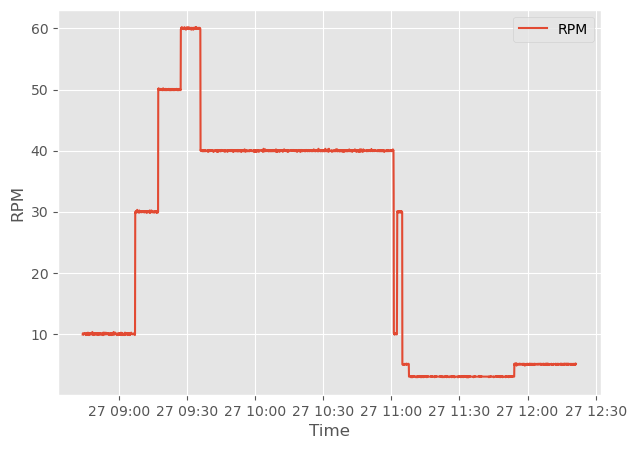

In [6]:
df_4 = df_4.astype({"스크류": float})  ## 컬럼을 통째로 str -> int로 변환

plt.figure(figsize=(7, 5))
plt.style.use("ggplot")
plt.xlabel("Time")
plt.ylabel("RPM")
plt.plot(df_4["Dates"], df_4["스크류"], label="RPM")
# plt.plot(df_4a['Dates'],df_4a['모터부하'], label='Load')
plt.legend()
plt.show()

In [7]:
df_1.columns[1:-2].to_list()

['6.5D',
 '8.0D',
 '9.5D',
 '11.0D',
 '12.5D',
 '14.0D',
 '15.5D',
 '17.0D',
 '18.5D',
 '20.0D',
 '21.5D',
 '23.0D',
 '24-BP',
 '25-BP']

## 평가 정보 입력 (샘플명, RPM, 평가 시간 등)

In [8]:
import pandas as pd

test_name = input("샘플명을 입력하세요(구분:쉼표): ").split(",")
test_rpm = input("RPM 조건을 입력하세요(구분:쉼표): ").split(",")
test_no = 0
test_aa = [""] * 3
test_list = pd.DataFrame(test_aa).T
for i in range(len(test_name)):
    for j in range(len(test_rpm)):
        test_sample = []
        test_sample.append(test_no)
        test_sample.append(test_name[i])
        test_sample.append(test_rpm[j])
        test_list.loc[test_no] = test_sample
        test_no += 1
test_list.columns = ["No", "Sample", "RPM"]
test_list.index = test_list.No
del test_list["No"]
print(test_list)
test_exclud = input("평가하지 않은 조건이 있으면 번호를 입력하세요(구분:쉼표, 삭제할 조건이 없으면 x): ").split(",")
if test_exclud[0] == "x":
    print(test_list)
else:
    for i in range(len(test_exclud)):
        test_list = test_list.drop(int(test_exclud[i]))
    test_list.reset_index(drop=True, inplace=True)  ## 평가하지 않은 조건을 잘라내고 다시 인덱스 설정
    print(test_list)

# 평가시간 입력받기
test_time = [""] * (len(test_list))
test_time2 = [""] * (len(test_list))
print("시작시간~종료시간을 입력해 주세요(hh:mm:ss~hh:mm:ss)")
for i in range(len(test_list)):
    test_time[i] = input(
        str(i)
        + ". Sample:"
        + test_list.iloc[i, 0]
        + ", RPM: "
        + test_list.iloc[i, 1]
        + ": "
    )  ## DataFrame에서 특정 셀의 값 읽기
    test_time2[i] = test_time[i].split("~")
    for j in range(2):
        test_time2[i][j] = (
            test_time2[i][j] + ":00"
        )  ## 초 단위 입력하지 않았을 때 오류 생기는 것을 방지하기 위해 00초 붙임
        test_time2[i][j] = datetime(
            input_year,
            input_month,
            input_day,
            int(test_time2[i][j].split(":")[0]),
            int(test_time2[i][j].split(":")[1]),
            int(test_time2[i][j].split(":")[2]),
        )

# test_time2: 입력시간을 전/후로 나눈 뒤 datetime 함수를 먹인 것 ==> 이제 df_1~df4 의 Dates와 연동시킬 수 있다.


## df_1_Final 포맷 만들기
df_1_Final = pd.DataFrame(
    columns=["Sample", "RPM", "Time"] + df_1.columns[1:-2].to_list()
)
df_1_Min = pd.DataFrame(
    columns=["Sample", "RPM", "Time"] + df_1.columns[1:-2].to_list()
)
df_1_Max = pd.DataFrame(
    columns=["Sample", "RPM", "Time"] + df_1.columns[1:-2].to_list()
)

for tl in range(len(test_list)):
    df_1_element = []
    df_1_element.extend(
        [test_list.iloc[tl, 0], test_list.iloc[tl, 1], test_time[tl]]
    )  ## 1개 추가는 append, 여러개는 extend
    df_1_element_min = []
    df_1_element_min.extend(
        [test_list.iloc[tl, 0], test_list.iloc[tl, 1], test_time[tl]]
    )
    df_1_element_max = []
    df_1_element_max.extend(
        [test_list.iloc[tl, 0], test_list.iloc[tl, 1], test_time[tl]]
    )

    df_1_a = df_1[
        (df_1["Dates"] > test_time2[tl][0]) & (df_1["Dates"] < test_time2[tl][1])
    ]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(1, 15):
        df_1_a = df_1_a.astype({df_1_a.columns[i]: int})
        df_1_element.append(df_1_a[df_1_a.columns[i]].mean())
        df_1_element_min.append(df_1_a[df_1_a.columns[i]].min())
        df_1_element_max.append(df_1_a[df_1_a.columns[i]].max())
    df_1_Final.loc[tl] = df_1_element
    df_1_Min.loc[tl] = df_1_element_min
    df_1_Max.loc[tl] = df_1_element_max

pd.options.display.float_format = "{:.1f}".format  ## 계산된 값을 소수점 첫째 자리까지만 표현
# df_1_Final


## df_2_Final 포맷 만들기
df_2_Final = pd.DataFrame(
    columns=["Sample", "RPM", "Time"] + df_1.columns[1:-2].to_list()
)

for tl in range(len(test_list)):
    df_2_element = []
    df_2_element.append(test_list.iloc[tl, 0])
    df_2_element.append(test_list.iloc[tl, 1])
    df_2_element.append(test_time[tl])

    df_2_a = df_2[
        (df_2["Dates"] > test_time2[tl][0]) & (df_2["Dates"] < test_time2[tl][1])
    ]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(1, 15):
        df_2_a = df_2_a.astype({df_2_a.columns[i]: int})
        df_2_element.append(df_2_a[df_2_a.columns[i]].mean())
    df_2_Final.loc[tl] = df_2_element
pd.options.display.float_format = "{:.1f}".format  ## 계산된 값을 소수점 첫째 자리까지만 표현
# df_2_Final


## df_3_Final 포맷 만들기
df_3_Final = pd.DataFrame(
    columns=["Sample", "RPM", "Time"] + df_3.columns[1:-2].to_list()
)

for tl in range(len(test_list)):
    df_3_element = []
    df_3_element.append(test_list.iloc[tl, 0])
    df_3_element.append(test_list.iloc[tl, 1])
    df_3_element.append(test_time[tl])

    df_3_a = df_3[
        (df_3["Dates"] > test_time2[tl][0]) & (df_3["Dates"] < test_time2[tl][1])
    ]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(1, 15):
        df_3_a = df_3_a.astype({df_3_a.columns[i]: int})
        df_3_element.append(df_3_a[df_3_a.columns[i]].mean())
    df_3_Final.loc[tl] = df_3_element
pd.options.display.float_format = "{:.1f}".format  ## 계산된 값을 소수점 첫째 자리까지만 표현
# df_3_Final


## df_4_Final 포맷 만들기
df_4_Final = pd.DataFrame(
    columns=["Sample", "RPM", "Time"] + df_4.columns[1:-2].to_list()
)

for tl in range(len(test_list)):
    df_4_element = []
    df_4_element.append(test_list.iloc[tl, 0])
    df_4_element.append(test_list.iloc[tl, 1])
    df_4_element.append(test_time[tl])

    df_4_a = df_4[
        (df_4["Dates"] > test_time2[tl][0]) & (df_4["Dates"] < test_time2[tl][1])
    ]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(1, 15):
        df_4_a = df_4_a.astype(
            {df_4_a.columns[i]: float}
        )  ## 스크류 rpm이 소수첫째자리까지 측정되므로 float로 변환
        df_4_element.append(df_4_a[df_4_a.columns[i]].mean())
    df_4_Final.loc[tl] = df_4_element
pd.options.display.float_format = "{:.1f}".format  ## 계산된 값을 소수점 첫째 자리까지만 표현
# df_4_Final

## df_1_rawdata 만들기
df_1_rawdata = df_1.copy()
df_1_rawdata["Sample"] = "-"
df_1_rawdata = df_1_rawdata.astype({"6.5D": float})
df_1_rawdata = df_1_rawdata.astype({"8.0D": float})
df_1_rawdata = df_1_rawdata.astype({"9.5D": float})
df_1_rawdata = df_1_rawdata.astype({"11.0D": float})
df_1_rawdata = df_1_rawdata.astype({"12.5D": float})
df_1_rawdata = df_1_rawdata.astype({"14.0D": float})
df_1_rawdata = df_1_rawdata.astype({"15.5D": float})
df_1_rawdata = df_1_rawdata.astype({"17.0D": float})
df_1_rawdata = df_1_rawdata.astype({"18.5D": float})
df_1_rawdata = df_1_rawdata.astype({"20.0D": float})
df_1_rawdata = df_1_rawdata.astype({"21.5D": float})
df_1_rawdata = df_1_rawdata.astype({"23.0D": float})
df_1_rawdata = df_1_rawdata.astype({"24-BP": float})
df_1_rawdata = df_1_rawdata.astype({"25-BP": float})


for tl in range(len(test_list)):  ## test_time2에 설정한 시간조건에 해당하는 df_4의 데이터에 샘플명 추가
    for raw in range(len(df_1_rawdata)):
        if df_1_rawdata.iloc[raw, 15] > test_time2[tl][0]:
            if df_1_rawdata.iloc[raw, 15] < test_time2[tl][1]:
                df_1_rawdata.iloc[raw, 17] = tl

## df_4_rawdata 만들기 (스크류, 모터회전, 모터부하 만 남겨두고, 샘플링 되는 일련번호가 들어있는 열을 추가)
df_4_rawdata = df_4.drop(
    [
        "냉각#1",
        "냉각#2",
        "Para 1",
        "Para 2",
        "Para 3",
        "Para 4",
        "Para 5",
        "Para 6",
        "Para 7",
        "Para 8",
        "Para 9",
    ],
    axis=1,
)
df_4_rawdata["Sample"] = "-"
df_4_rawdata = df_4_rawdata.astype(
    {"모터부하": float}
)  ##모터부하 항을 float로 변환하여 추후 작업이 용이하도록 함

for tl in range(len(test_list)):  ## test_time2에 설정한 시간조건에 해당하는 df_4의 데이터에 샘플명 추가
    for raw in range(len(df_4_rawdata)):
        if df_4_rawdata.iloc[raw, 4] > test_time2[tl][0]:
            if df_4_rawdata.iloc[raw, 4] < test_time2[tl][1]:
                df_4_rawdata.iloc[raw, 6] = tl

## dr_1_Final2 만들기 (후작업 편의를 위해 평균, +오차, -오차를 각각 입력한 테이블 - 샘플별)

## df_1_Final2 포맷 만들기
df_1_Final2 = pd.DataFrame(
    columns=["Sample", "RPM", "Time", "구분"] + df_1.columns[1:-2].to_list()
)
for tl in range(len(test_list)):
    for categ in range(3):
        df_1_element2 = []
        df_1_element2.extend(
            [test_list.iloc[tl, 0], test_list.iloc[tl, 1], test_time[tl]]
        )
        if categ == 0:
            df_1_element2.append("AVG")
            for i in range(3, 17):
                df_1_element2.append(df_1_Final.iloc[tl, i])
        elif categ == 1:
            df_1_element2.append("Max-AVG")
            for i in range(3, 17):
                df_1_element2.append(df_1_Max.iloc[tl, i] - df_1_Final.iloc[tl, i])
        else:
            df_1_element2.append("AVG-Min")
            for i in range(3, 17):
                df_1_element2.append(df_1_Final.iloc[tl, i] - df_1_Min.iloc[tl, i])
        df_1_Final2.loc[tl * 3 + categ] = df_1_element2

샘플명을 입력하세요(구분:쉼표):  aa,bb
RPM 조건을 입력하세요(구분:쉼표):  50


   Sample RPM
No           
0      aa  50
1      bb  50


평가하지 않은 조건이 있으면 번호를 입력하세요(구분:쉼표, 삭제할 조건이 없으면 x):  x


   Sample RPM
No           
0      aa  50
1      bb  50
시작시간~종료시간을 입력해 주세요(hh:mm:ss~hh:mm:ss)


0. Sample:aa, RPM: 50:  10:00~10:05
1. Sample:bb, RPM: 50:  10:30~10:35


## 평가정보 확인

In [9]:
# df_1_Final
# df_1_Max
# df_1_Min
# df_1_Final2  ## ±error 추가한 table - 그래프작업을 수월하게 하기 위한 rawdata 편집

# df_2_Final
# df_3_Final
# df_4_Final
df_4_rawdata

,Date,스크류,모터회전,모터부하,Dates,Dates_diff,Sample
0,2021/1/27 8:44:3,9.9,257,86.0,2021-01-27 08:44:03,NaT,-
1,2021/1/27 8:44:8,10.1,261,97.0,2021-01-27 08:44:08,0 days 00:00:05,-
2,2021/1/27 8:44:13,10.0,259,105.0,2021-01-27 08:44:13,0 days 00:00:05,-
3,2021/1/27 8:44:18,10.0,258,114.0,2021-01-27 08:44:18,0 days 00:00:05,-
4,2021/1/27 8:44:23,9.9,257,123.0,2021-01-27 08:44:23,0 days 00:00:05,-
...,...,...,...,...,...,...,...
2593,2021/1/27 12:20:57,4.9,128,81.0,2021-01-27 12:20:57,0 days 00:00:05,-
2594,2021/1/27 12:21:2,5.0,130,80.0,2021-01-27 12:21:02,0 days 00:00:05,-
2595,2021/1/27 12:21:7,5.1,133,78.0,2021-01-27 12:21:07,0 days 00:00:05,-
2596,2021/1/27 12:21:12,5.0,130,77.0,2021-01-27 12:21:12,0 days 00:00:05,-


## xlsx File 저장하기

In [14]:
save_name = input("파일명을 입력하세요: ")
with pd.ExcelWriter(save_name + ".xlsx") as w:
    #    a_class_df.to_excel(w, sheet_name='A반', index=False)
    #    b_class_df.to_excel(w, sheet_name='B반', index=False)
    df_1_Final.to_excel(w, sheet_name="1", index_label="Avg")
    df_2_Final.to_excel(w, sheet_name="2")
    df_3_Final.to_excel(w, sheet_name="3")
    df_4_Final.to_excel(w, sheet_name="4")
    df_1_rawdata.to_excel(w, sheet_name="1_raw")
    df_4_rawdata.to_excel(w, sheet_name="4_raw")
    df_1_Min.to_excel(
        w,
        sheet_name="1",
        startrow=len(df_1_Final) + 4,
        startcol=0,
        index_label="Min",
    )  ## 같은 1번시트에서 아래쪽에 다른 Dataframe을 붙여넣기 위한 옵션
    df_1_Max.to_excel(
        w,
        sheet_name="1",
        startrow=(len(df_1_Final) + 4) * 2,
        startcol=0,
        index_label="Max",
    )  ## 같은 1번시트에서 아래쪽에 다른 Dataframe을 붙여넣기 위한 옵션
    df_1_Final2.to_excel(
        w,
        sheet_name="1",
        startrow=(len(df_1_Final) + 4) * 3,
        startcol=0,
        index_label="error",
    )  ## 같은 1번시트에서 아래쪽에 다른 Dataframe을 붙여넣기 위한 옵션

파일명을 입력하세요:  aavaxa
